In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models import LdaModel
from scipy.sparse import csr_matrix
import joblib

# Contoh penggunaan
data = pd.read_csv('data_pemilu.csv')
num_topics = 1  # Jumlah topik yang diinginkan
top_n_words = 5  # Jumlah kata kunci untuk setiap topik

vectorizer = TfidfVectorizer(min_df=1,
                             norm='l2',
                             smooth_idf=True,
                             use_idf=True)

# Mengubah teks menjadi representasi vektor
X = vectorizer.fit_transform(data['content_clean'])

# Membuat sparse matrix menjadi format CSR
X_csr = csr_matrix(X)

# Membuat list dokumen Gensim corpus
corpus = []
for doc in X_csr:
    doc = [(idx, val) for idx, val in zip(doc.indices, doc.data)]
    corpus.append(doc)

# Membuat dictionary
id2word = {idx: word for idx, word in enumerate(vectorizer.get_feature_names_out())}

# Membuat model LDA dengan gensim
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42)

# Simpan model dan vectorizer menggunakan joblib
joblib.dump((vectorizer, lda_model), 'lda_tfidf_model.pkl')


['lda_tfidf_model.pkl']

Topik 1: 0.004*"gibran" + 0.004*"prabowo" + 0.003*"ganjar" + 0.003*"debat" + 0.003*"anies" + 0.002*"mahfud" + 0.002*"cawapres" + 0.002*"presiden" + 0.002*"2024" + 0.002*"jokowi"


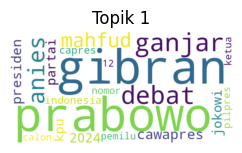

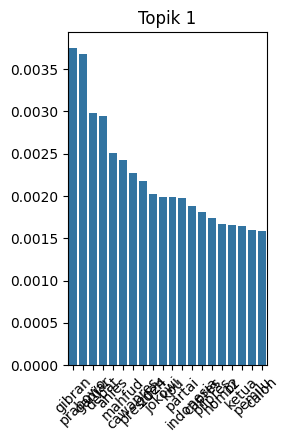

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.sparse import csr_matrix

# Memuat kembali model dan vectorizer
vectorizer, lda_model = joblib.load('lda_tfidf_model.pkl')

# Contoh penggunaan
data = pd.read_csv('data_pemilu.csv')
num_topics = 1  # Jumlah topik yang diinginkan
top_n_words = 20  # Jumlah kata kunci untuk setiap topik

# Mendapatkan kata-kata kunci untuk setiap topik
for idx, topic in lda_model.print_topics():
    print(f"Topik {idx + 1}: {topic}")

plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(lda_model.show_topic(i, topn=top_n_words)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    topic_words = [word for word, _ in lda_model.show_topic(i, topn=top_n_words)]
    word_probs = [prob for _, prob in lda_model.show_topic(i, topn=top_n_words)]
    sns.barplot(x=topic_words, y=word_probs)
    plt.title(f'Topik {i+1}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
